## <div style="text-align: center;"><b><span style='color:#e61227'>|</span> EDA of Healthcare Dataset in R<span style='color:#e61227'>|</span></b></div>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>0. </span></b> Load the Necessary Libraries</b></p>
</div>


In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## <div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letterspacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)"><p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1. </span></b> Read the Dataframe</b></p></div>


In [2]:
# Read the healthcare dataset from the specified file path and store it in the 'health' dataframe
health <- read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")

Rows: 10000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Name, Gender, Blood Type, Medical Condition, Doctor, Hospital, In...
dbl   (3): Age, Billing Amount, Room Number
date  (2): Date of Admission, Discharge Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Display the first few rows
head(health)

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>
Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98,146,Elective,2022-12-01,Aspirin,Inconclusive
Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06,404,Emergency,2023-06-15,Lipitor,Normal
Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.90,292,Emergency,2019-02-08,Lipitor,Normal
Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32,480,Urgent,2020-05-03,Penicillin,Abnormal
Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34,477,Urgent,2021-08-02,Paracetamol,Normal
Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.36,180,Urgent,2020-08-23,Aspirin,Abnormal


In [4]:
# Display the last few rows
tail(health)

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>
Jorge Obrien,69,Male,A+,Diabetes,2021-12-25,Frank Miller,Scott LLC,UnitedHealthcare,16793.598,341,Elective,2022-01-06,Penicillin,Inconclusive
James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840,110,Elective,2022-08-02,Ibuprofen,Abnormal
Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717,244,Emergency,2022-01-29,Ibuprofen,Normal
Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.203,312,Elective,2022-07-15,Ibuprofen,Normal
Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.345,420,Urgent,2020-02-26,Penicillin,Normal
Eric King,20,Male,B-,Arthritis,2023-03-22,Tasha Avila,"Torres, Young and Stewart",Aetna,37223.966,290,Emergency,2023-04-15,Penicillin,Abnormal


## <div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letterspacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)"><p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2. </span></b> Data Cleaning</b></p></div>


In [5]:
# Print the dimensions of the 'health' dataframe
print(dim(health))

[1] 10000    15


In [6]:
# Print a summary of the dataframe
summary(health)

     Name                Age           Gender           Blood Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical Condition  Date of Admission       Doctor            Hospital        
 Length:10000       Min.   :2018-10-30   Length:10000       Length:10000      
 Class :character   1st Qu.:2020-02-10   Class :character   Class :character  
 Mode  :character   Median :2021-05-02   Mode  :character   Mode  :character  
                    Mean   :2021-05-01                                        
                    3rd Qu.:2022-07-23                                        
        

In [7]:
# Display the structure of the 'health' dataframe
str(health)

spc_tbl_ [10,000 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Name              : chr [1:10000] "Tiffany Ramirez" "Ruben Burns" "Chad Byrd" "Antonio Frederick" ...
 $ Age               : num [1:10000] 81 35 61 49 51 41 82 55 33 39 ...
 $ Gender            : chr [1:10000] "Female" "Male" "Male" "Male" ...
 $ Blood Type        : chr [1:10000] "O-" "O+" "B-" "B-" ...
 $ Medical Condition : chr [1:10000] "Diabetes" "Asthma" "Obesity" "Asthma" ...
 $ Date of Admission : Date[1:10000], format: "2022-11-17" "2023-06-01" ...
 $ Doctor            : chr [1:10000] "Patrick Parker" "Diane Jackson" "Paul Baker" "Brian Chandler" ...
 $ Hospital          : chr [1:10000] "Wallace-Hamilton" "Burke, Griffin and Cooper" "Walton LLC" "Garcia Ltd" ...
 $ Insurance Provider: chr [1:10000] "Medicare" "UnitedHealthcare" "Medicare" "Medicare" ...
 $ Billing Amount    : num [1:10000] 37491 47304 36875 23303 18086 ...
 $ Room Number       : num [1:10000] 146 404 292 480 477 180 161 384 215 310 ...
 $ Admissi

In [8]:
# Column-wise sum of NA values
print(colSums(is.na(health)))

              Name                Age             Gender         Blood Type 
                 0                  0                  0                  0 
 Medical Condition  Date of Admission             Doctor           Hospital 
                 0                  0                  0                  0 
Insurance Provider     Billing Amount        Room Number     Admission Type 
                 0                  0                  0                  0 
    Discharge Date         Medication       Test Results 
                 0                  0                  0 


## <div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letterspacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)"><p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3. </span></b> Data Transformation</b></p></div>

In [9]:
# Print the column names of the 'health' dataframe
names(health)

[1] "Name"               "Age"                "Gender"            
 [4] "Blood Type"         "Medical Condition"  "Date of Admission" 
 [7] "Doctor"             "Hospital"           "Insurance Provider"
[10] "Billing Amount"     "Room Number"        "Admission Type"    
[13] "Discharge Date"     "Medication"         "Test Results"

In [10]:
# Convert certain columns to appropriate data types
health <- health %>%
    mutate(
        Age = as.factor(Age), 
        Gender = as.factor(Gender),  
        `Blood Type` = as.factor(`Blood Type`),
        `Medical Condition` = as.factor(`Medical Condition`),
        `Date of Admission` = as.Date(`Date of Admission`, format = "%m-%d-%Y"),
        Doctor = as.factor(Doctor), 
        Hospital = as.factor(Hospital),
        `Insurance Provider` = as.factor(`Insurance Provider`),
        `Billing Amount` = as.numeric(`Billing Amount`),
        `Room Number` = as.factor(`Room Number`),
        `Admission Type` = as.factor(`Admission Type`),
        `Discharge Date` = as.Date(`Discharge Date`, format = "%m-%d-%Y"),
        Medication = as.factor(Medication),
        `Test Results` = as.factor(`Test Results`)
    )

In [11]:
# Check the data types of columns
sapply(health, class)

Name                Age             Gender         Blood Type 
       "character"           "factor"           "factor"           "factor" 
 Medical Condition  Date of Admission             Doctor           Hospital 
          "factor"             "Date"           "factor"           "factor" 
Insurance Provider     Billing Amount        Room Number     Admission Type 
          "factor"          "numeric"           "factor"           "factor" 
    Discharge Date         Medication       Test Results 
            "Date"           "factor"           "factor"

In [12]:
head(health)

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
<chr>,<fct>,<fct>,<fct>,<fct>,<date>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<date>,<fct>,<fct>
Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98,146,Elective,2022-12-01,Aspirin,Inconclusive
Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06,404,Emergency,2023-06-15,Lipitor,Normal
Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.90,292,Emergency,2019-02-08,Lipitor,Normal
Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32,480,Urgent,2020-05-03,Penicillin,Abnormal
Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34,477,Urgent,2021-08-02,Paracetamol,Normal
Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.36,180,Urgent,2020-08-23,Aspirin,Abnormal


## <div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letterspacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)"><p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>4. </span></b> Data Visualizationn</b></p></div>

In [13]:
# List of factor columns
factor_cols <- c('Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type')

In [14]:
# Define a function to create a plot for a given column
create_plot <- function(data, col) {
  # Create a ggplot object for the current column
  plot <- ggplot(data = data) +
    geom_bar(mapping = aes(x = !!sym(col)), fill = "skyblue") +
    labs(title = paste("Distribution of", col), x = col, y = "Count") +
    theme(
      plot.background = element_rect(fill = "#f0f0f0"),
      panel.background = element_rect(fill = "lightyellow"),
      panel.grid.major = element_line(color = "darkgray")
    )
  
  return(plot)
}

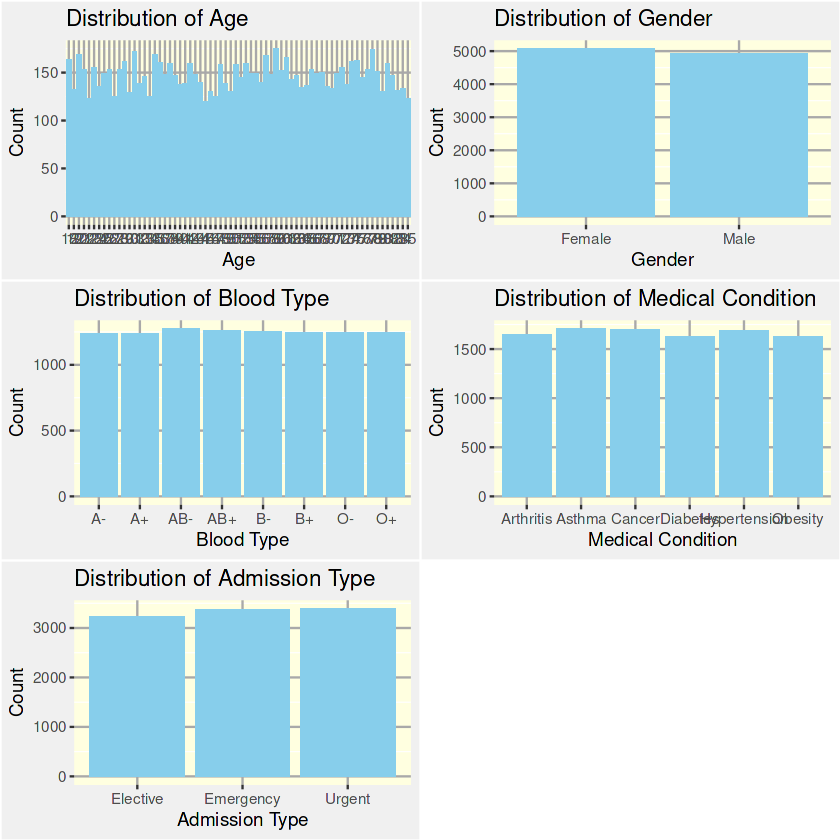

In [15]:
# Initialize an empty list to store plots
plots <- list()

# Iterate over each factor column
for (col in factor_cols) {
    # Create a plot for the current column using the defined function
    plot <- create_plot(health, col)
    
    # Store the plot in the list with the column name as key
    plots[[col]] <- plot
}

# Arrange and display the plots in a grid layout
gridExtra::grid.arrange(grobs = plots, ncol = 2)

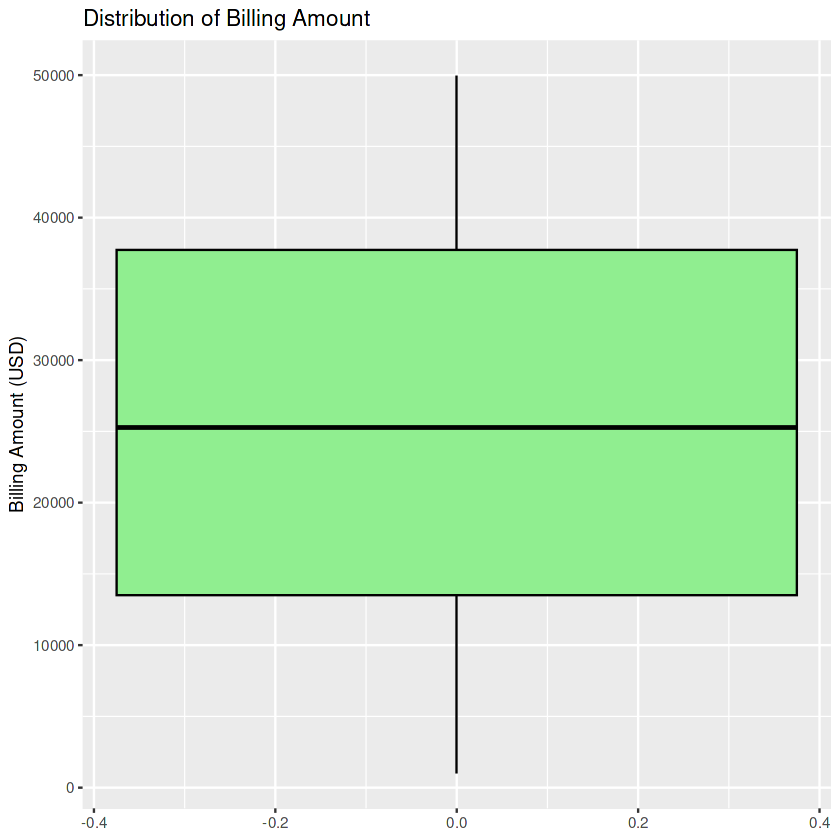

In [16]:
# Boxplot of Billing Amount
ggplot(health, aes(y = `Billing Amount`)) +
  geom_boxplot(fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Billing Amount", y = "Billing Amount (USD)")

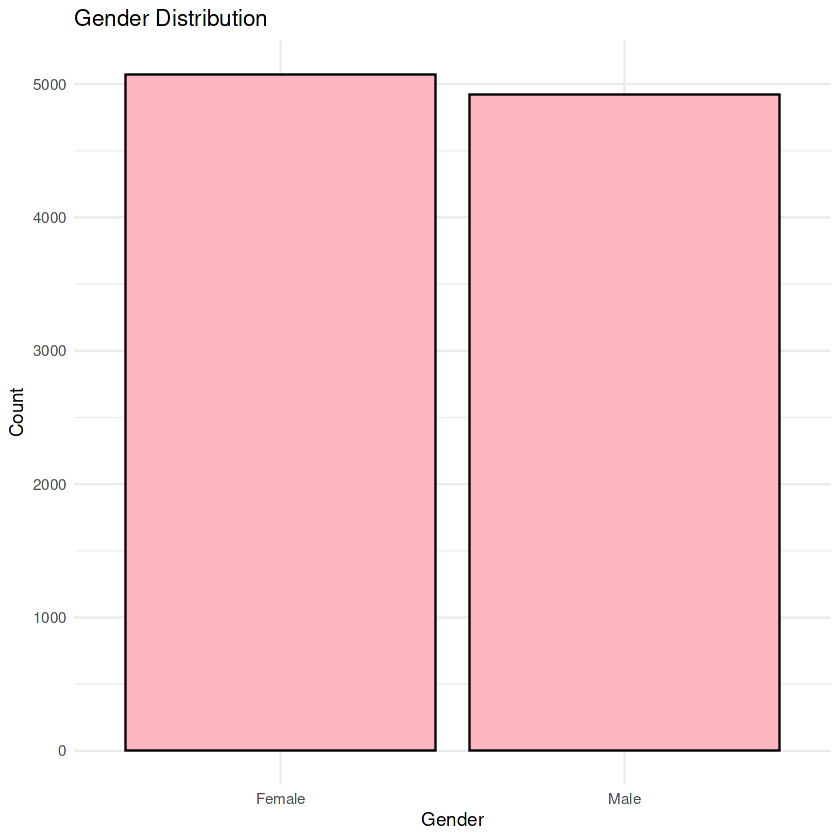

In [17]:
# Bar plot of Gender
ggplot(health, aes(x = Gender)) +
  geom_bar(fill = "lightpink", color = "black") +
  labs(title = "Gender Distribution", x = "Gender", y = "Count") +
  theme_minimal()

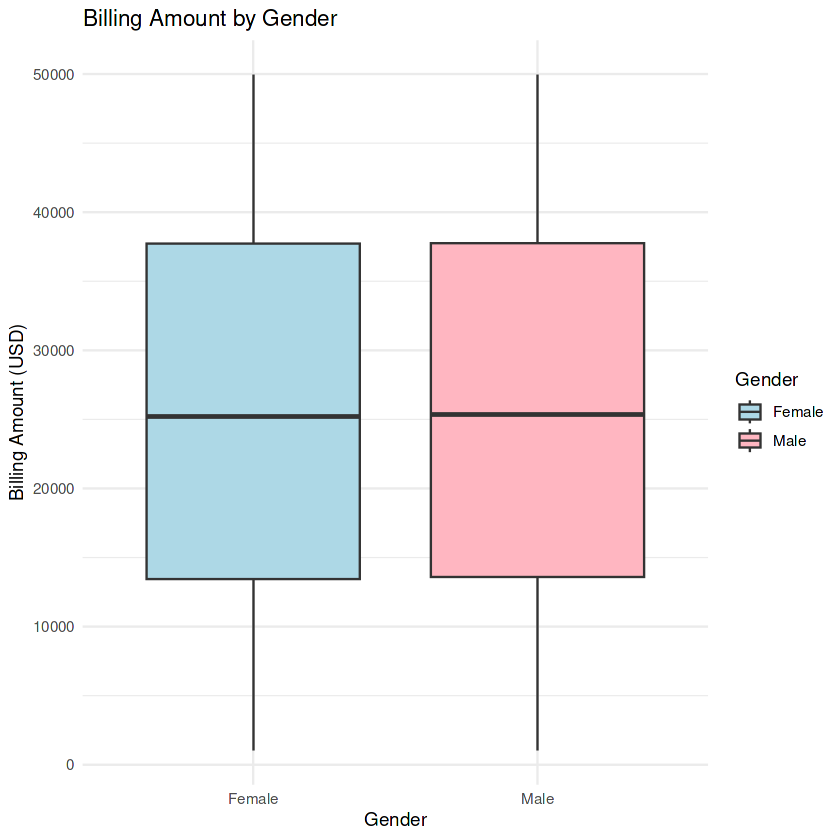

In [18]:
# Boxplot of Billing Amount by Gender
ggplot(health, aes(x = Gender, y = `Billing Amount`, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Billing Amount by Gender", x = "Gender", y = "Billing Amount (USD)") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightpink"))

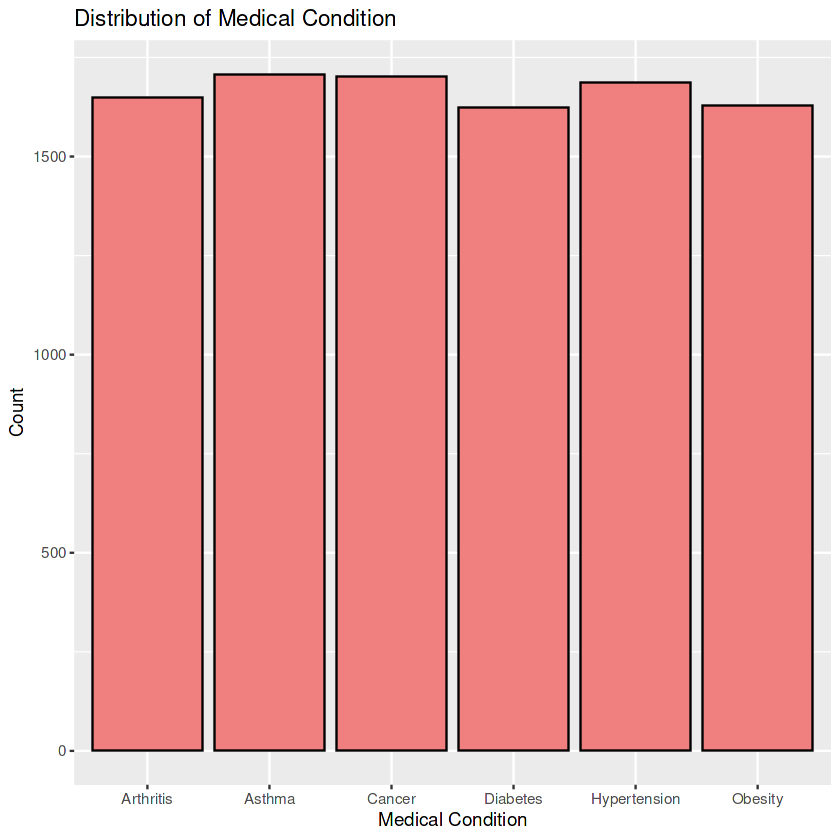

In [19]:
# Bar plot of Medical Condition
ggplot(health, aes(x = `Medical Condition`)) +
  geom_bar(fill = "lightcoral", color = "black") +
  labs(title = "Distribution of Medical Condition", x = "Medical Condition", y = "Count")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


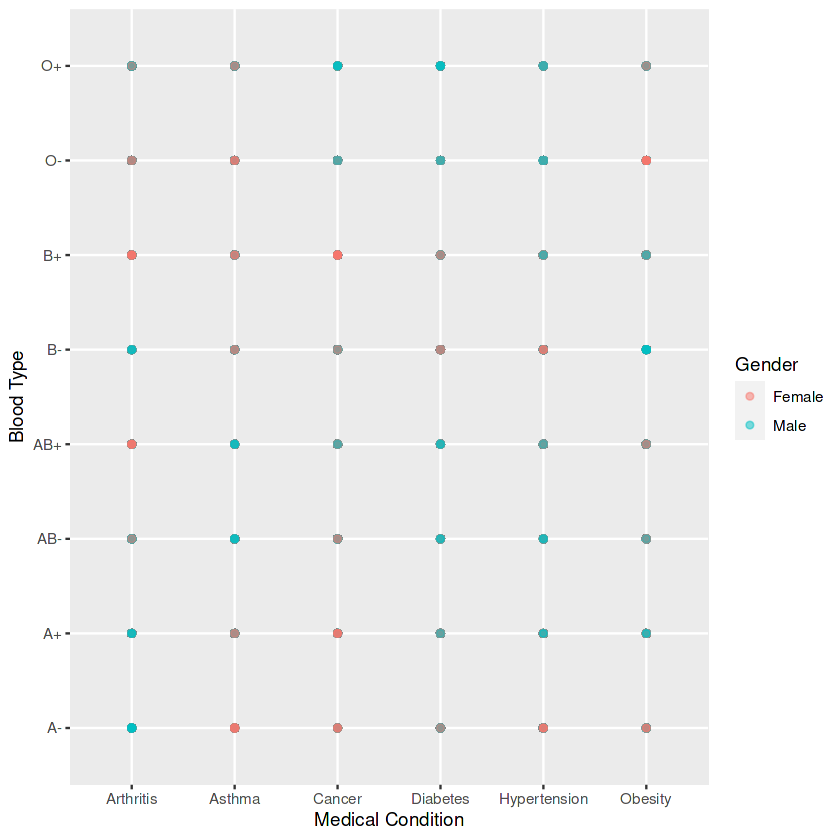

In [20]:
# Plot the scatter plot
ggplot(data = health) +
  geom_point(mapping = aes(x = `Medical Condition`, y = `Blood Type`, color = `Gender`), alpha = 0.5) +
  geom_smooth(mapping = aes(x = `Medical Condition`, y = `Blood Type`), se = FALSE)

In [21]:
# Calculate the number of days each person remained in the hospital
health <- mutate(health, 
                 days_in_hospital = as.numeric(`Discharge Date` - `Date of Admission`))

# Group the data by 'Gender' and summarize the number of days spent in the hospital
hospital_duration <- health %>%
  group_by(Gender) %>%
  summarize(avg_days = mean(days_in_hospital, na.rm = TRUE),
            median_days = median(days_in_hospital, na.rm = TRUE),
            max_days = max(days_in_hospital, na.rm = TRUE),
            min_days = min(days_in_hospital, na.rm = TRUE))

# View the summarized data
hospital_duration

Gender,avg_days,median_days,max_days,min_days
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Female,15.61576,16,30,1
Male,15.50619,15,30,1


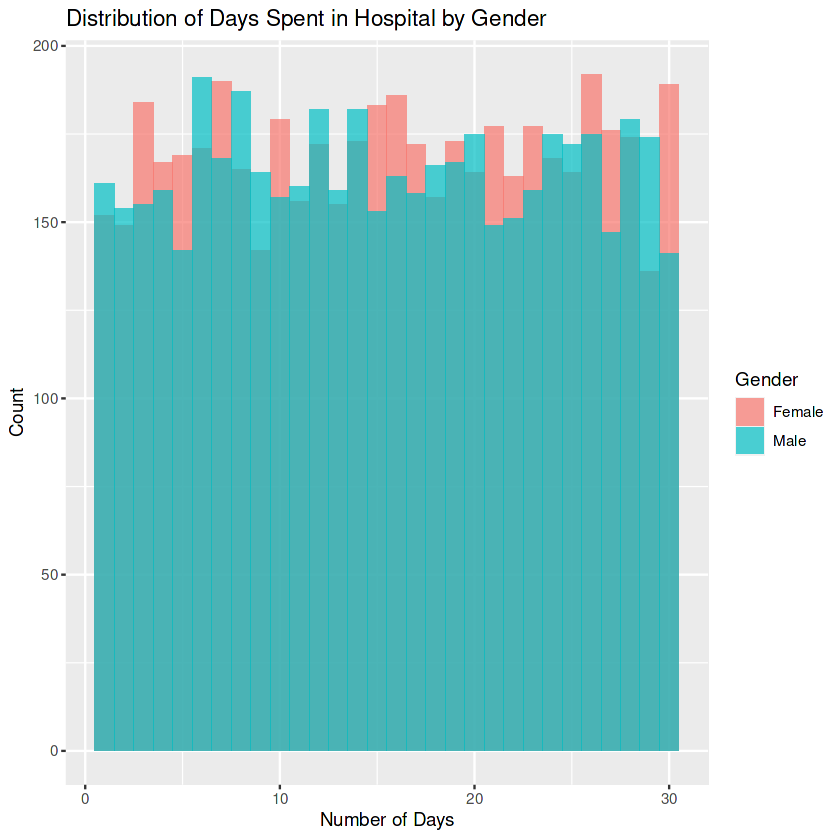

In [22]:
ggplot(health, aes(x = days_in_hospital, fill = Gender)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.7) +
  labs(title = "Distribution of Days Spent in Hospital by Gender",
       x = "Number of Days", y = "Count")

In [23]:
# Convert Age to numeric if it's a factor
health$Age <- as.numeric(as.character(health$Age))

# Grouping by Gender and Age Group
group1 <- health %>%
  mutate(Age_Group = case_when(
    Age <= 18 ~ "Child",
    Age > 18 & Age <= 65 ~ "Adult",
    Age > 65 ~ "Elderly"
  )) %>%
  group_by(Gender, Age_Group) %>%
  summarise(
    Total_Patients = n(),
    Average_Billing_Amount = mean(`Billing Amount`),
    Median_Age = median(Age),
    .groups = "drop"
  )

group1

Gender,Age_Group,Total_Patients,Average_Billing_Amount,Median_Age
<fct>,<chr>,<int>,<dbl>,<dbl>
Female,Adult,3466,25165.88,42
Female,Child,86,26241.91,18
Female,Elderly,1523,26166.45,75
Male,Adult,3436,25818.35,42
Male,Child,78,26951.15,18
Male,Elderly,1411,24819.83,76


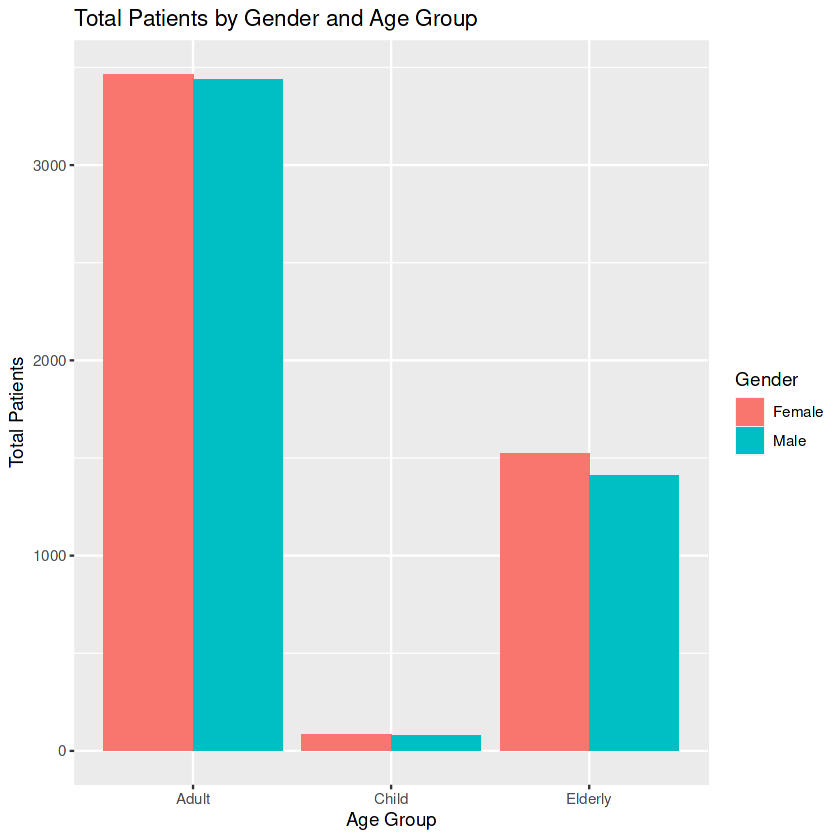

In [24]:
# Bar plot for total patients
ggplot(group1, aes(x = Age_Group, y = Total_Patients, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Patients by Gender and Age Group",
       x = "Age Group",
       y = "Total Patients",
       fill = "Gender")

In [25]:
# Grouping by Medical Condition and Insurance Provider
group2 <- health %>%
  group_by(`Medical Condition`, `Insurance Provider`) %>%
  summarise(
    Total_Patients = n(),
    Average_Billing_Amount = mean(`Billing Amount`),
    Median_Age = median(Age)
  )
head(group2)

`summarise()` has grouped output by 'Medical Condition'. You can override using
the `.groups` argument.


Medical Condition,Insurance Provider,Total_Patients,Average_Billing_Amount,Median_Age
<fct>,<fct>,<int>,<dbl>,<dbl>
Arthritis,Aetna,308,24694.86,51.5
Arthritis,Blue Cross,348,25989.52,53.0
Arthritis,Cigna,349,25189.87,53.0
Arthritis,Medicare,308,24206.38,51.0
Arthritis,UnitedHealthcare,337,25704.43,51.0
Asthma,Aetna,368,24761.52,54.5


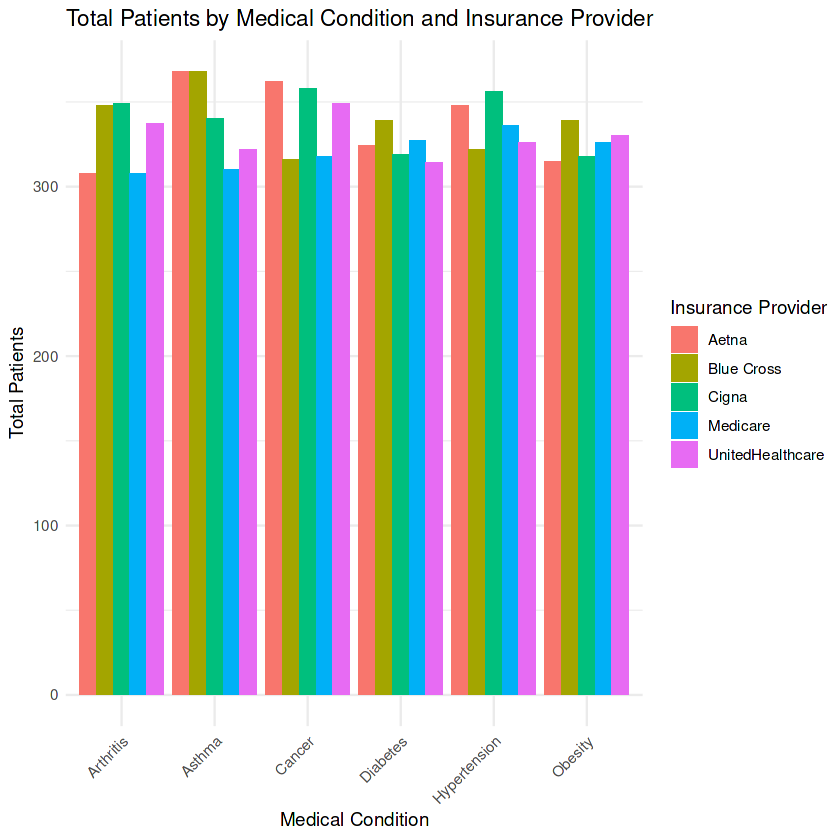

In [26]:
ggplot(group2, aes(x = `Medical Condition`, y = Total_Patients, fill = `Insurance Provider`)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Patients by Medical Condition and Insurance Provider",
       x = "Medical Condition", y = "Total Patients",
       fill = "Insurance Provider") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [27]:
# Grouping by Hospital and Doctor
group3 <- health %>%
  group_by(Hospital, Doctor) %>%
  summarise(
    Total_Patients = n(),
    Median_Age = median(Age)
  ) %>%
  arrange(desc(Total_Patients)) %>%
  slice_max(n = 10, order_by = Total_Patients)

head(group3)

`summarise()` has grouped output by 'Hospital'. You can override using the
`.groups` argument.


Hospital,Doctor,Total_Patients,Median_Age
<fct>,<fct>,<int>,<dbl>
Abbott Inc,Jon Robinson,1,53
Abbott LLC,Angela Walton,1,31
Abbott LLC,Karen Williams,1,65
Abbott PLC,Jimmy Hughes,1,54
Abbott-Jordan,Justin Levine,1,81
Abbott-Phillips,Robin Kane,1,67


In [28]:
# Grouping by Admission Type and Gender
group4 <- health %>%
  group_by(`Admission Type`, Gender) %>%
  summarise(
    Total_Patients = n()
  )
group4

`summarise()` has grouped output by 'Admission Type'. You can override using
the `.groups` argument.


Admission Type,Gender,Total_Patients
<fct>,<fct>,<int>
Elective,Female,1640
Elective,Male,1602
Emergency,Female,1701
Emergency,Male,1666
Urgent,Female,1734
Urgent,Male,1657


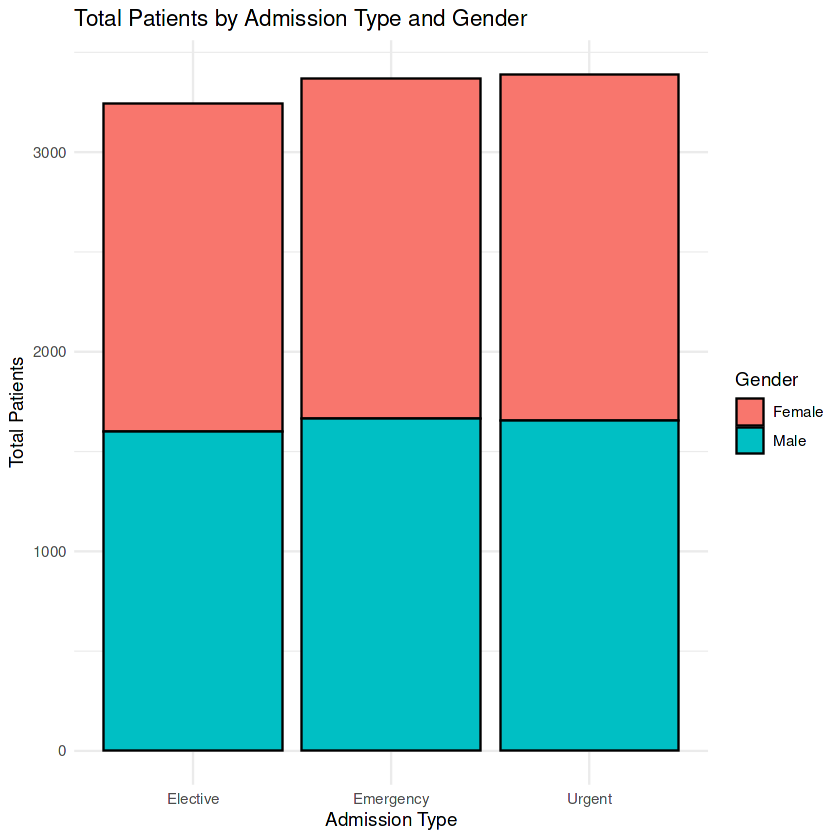

In [29]:
# Create a stacked bar plot for grouped by Admission Type and Gender table
ggplot(group4, aes(x = `Admission Type`, y = Total_Patients, fill = Gender)) +
  geom_bar(stat = "identity", position = "stack", color = "black") +
  labs(title = "Total Patients by Admission Type and Gender",
       x = "Admission Type",
       y = "Total Patients",
       fill = "Gender") +
  theme_minimal()

## <div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letterspacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)"><p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>5. </span></b> Correlation</b></p></div>

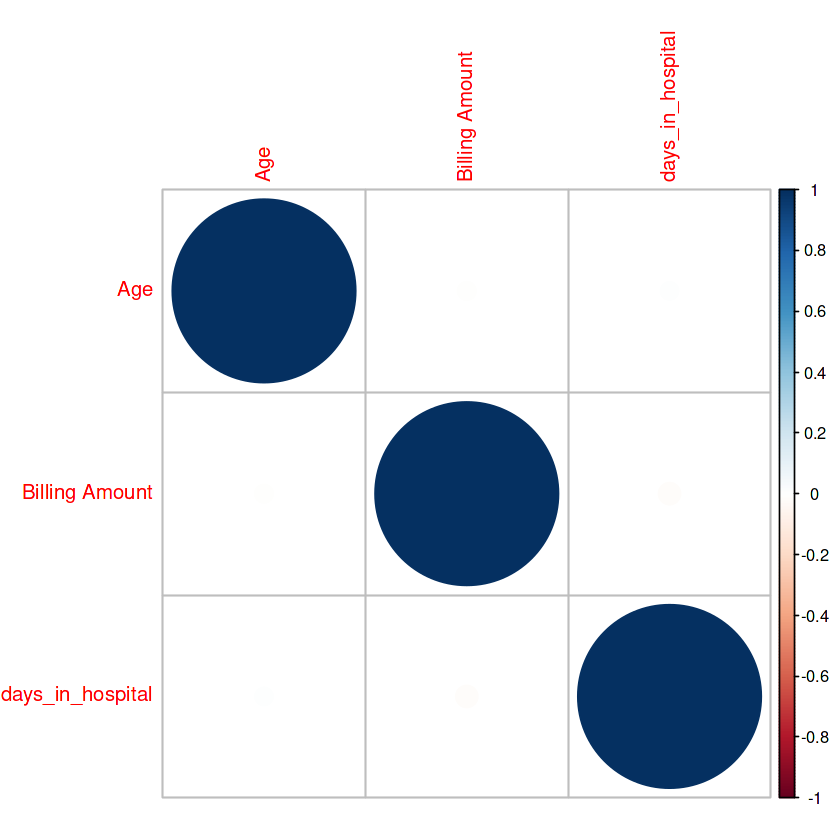

In [30]:
# Select only numeric columns for correlation
numeric_cols <- sapply(health, is.numeric)
numeric_data <- health[, numeric_cols]

# Calculate correlation
correlation_matrix <- cor(numeric_data)
corrplot::corrplot(correlation_matrix, method = "circle")